# Setup


In [1]:
# Setup
import numpy as np
from numpy import linalg as LA
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal, fft
import math as math
import os
from matplotlib.patches import Polygon
import copy
from scipy.stats import norm
import statistics
# plotting parameters
#determine colors and font size|
colors = dict(M='#6600CC',
              F='#000000',
              B='#FFFFFF',
              H='#009900',
              r='#FDB119',
              u='#009900',
              u25='#BBF90F',
              u75='#006400',
              d='#FD6E19',
              #y='#0033FF',  #or 6600CC which is darker and I prefer 
              y='#6600CC',  #or 6600CC which is darker and I prefer 
              N='#0000CC',
              D='#CC0000',
              g='#B1B1B1', #grey
              first5='#B1B1B1',
              last5='#999999')
              # D = dominant = right; N = nondominant = left
yfill = list(matplotlib.colors.to_rgba(colors['y']))
yfill[-1] = 0.3

ufill = list(matplotlib.colors.to_rgba(colors['u']))
ufill[-1] = 0.3

gfill = list(matplotlib.colors.to_rgba(colors['g']))
gfill[-1] = 0.3

rfill = list(matplotlib.colors.to_rgba(colors['r']))
rfill[-1] = 0.3

font = {#'family' : 'normal',
        # 'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)
## Collect data from all participants
# function that filters npz files
def fun(f):
    if f.endswith('.npz') and not f.endswith('rst0.npz') and not f.endswith('rst1.npz') and not f.endswith('rst2.npz'):
        return True
    else:
        return False

#eliminate the first 2 trials
def fun2(f):
    if f.endswith('.npz') and not f.endswith('rst0.npz') and not f.endswith('rst1.npz') and not f.endswith('rst2.npz') and not f.endswith('a0.npz') and not f.endswith('a1.npz'):
        return True
    else:
        return False

#only keep the last 4 trials
def fun4(f):
    if  f.endswith('a6.npz') or f.endswith('a7.npz') or f.endswith('a8.npz') or f.endswith('a9.npz'):
        return True
    else:
        return False
#import all data from git
def COLLECTDATA(path0,path1,path2,path3,path4,path5,path6):
  files_0 = os.listdir(path0) 
  files_0 = list(filter(fun2, files_0))
  files_1 = os.listdir(path1) 
  files_1 = list(filter(fun2, files_1))
  files_2 = os.listdir(path2)
  files_2 = list(filter(fun2, files_2))
  files_3 = os.listdir(path3)
  files_3 = list(filter(fun2, files_3))
  files_4 = os.listdir(path4)
  files_4 = list(filter(fun2, files_4))
  files_5 = os.listdir(path5)
  files_5 = list(filter(fun, files_5))
  files_6 = os.listdir(path6)
  files_6 = list(filter(fun, files_6))

  files0 = files_0
  files1 = files_1
  files2 = files_2
  files3 = files_3
  files4 = files_4
  files5 = files_5
  files6 = files_6

  SLIDER = {}; EMG = {}; FUSION50 = {}; FUSION25 = {}; FUSION75 = {}; SLIDER2 = {}; EMG2 = {}
#   i = 0
#   for trials in files0:
#       #make a dict for each trial in the folder
#       trial = dict(np.load(os.path.join(path0, trials), allow_pickle=True))
#       #delete "filename"
#       del trial['filename']
#       #eliminate first 5 seconds of data
#       for k in range(len(trial.keys())):
#         trial[list(trial.keys())[k]] = trial[list(trial.keys())[k]][301:-1]
#       #create a nested dict, including all trials
#       SLIDER['trial'+str(i)] = trial
#       i+=1

#   i = 0
#   for trials in files1:
#       trial = dict(np.load(os.path.join(path1, trials), allow_pickle=True))
#       del trial['filename']
#       for k in range(len(trial.keys())):
#         trial[list(trial.keys())[k]] = trial[list(trial.keys())[k]][301:-1]
#       EMG['trial'+str(i)] = trial
#       i+=1

#   i = 0
#   for trials in files2:
#       trial = dict(np.load(os.path.join(path2, trials), allow_pickle=True))
#       del trial['filename']
#       for k in range(len(trial.keys())):
#         trial[list(trial.keys())[k]] = trial[list(trial.keys())[k]][301:-1]
#       FUSION50['trial'+str(i)] = trial
#       i+=1

#   i = 0
#   for trials in files3:
#       trial = dict(np.load(os.path.join(path3, trials), allow_pickle=True))
#       del trial['filename']
#       for k in range(len(trial.keys())):
#         trial[list(trial.keys())[k]] = trial[list(trial.keys())[k]][301:-1]
#       FUSION25['trial'+str(i)] = trial
#       i+=1

#   i = 0
#   for trials in files4:
#       trial = dict(np.load(os.path.join(path4, trials), allow_pickle=True))
#       del trial['filename']
#       for k in range(len(trial.keys())):
#         trial[list(trial.keys())[k]] = trial[list(trial.keys())[k]][301:-1]
#       FUSION75['trial'+str(i)] = trial
#       i+=1

#   i = 0
#   for trials in files5:
#       trial = dict(np.load(os.path.join(path5, trials), allow_pickle=True))
#       del trial['filename']
#       for k in range(len(trial.keys())):
#         trial[list(trial.keys())[k]] = trial[list(trial.keys())[k]][301:-1]
#       SLIDER2['trial'+str(i)] = trial
#       i+=1

#   i = 0
#   for trials in files6:
#       trial = dict(np.load(os.path.join(path6, trials), allow_pickle=True))
#       del trial['filename']
#       for k in range(len(trial.keys())):
#         trial[list(trial.keys())[k]] = trial[list(trial.keys())[k]][301:-1]
#       EMG2['trial'+str(i)] = trial
#       i+=1

#   #create nested dict
#   HCPS = {  'condition0': SLIDER, 
#             'condition1': EMG,
#             'condition2': FUSION50,
#             'condition3': FUSION25,
#             'condition4': FUSION75,
#             'condition5': SLIDER2, 
#             'condition6': EMG2}
#   return HCPS
            
#import all data from git
def COLLECTDATA(path0,path1,path2,path3,path4,path5,path6):
  files_0 = os.listdir(path0) 
  files_0 = list(filter(fun, files_0))
  files_1 = os.listdir(path1) 
  files_1 = list(filter(fun, files_1))
  files_2 = os.listdir(path2)
  files_2 = list(filter(fun, files_2))
  files_3 = os.listdir(path3)
  files_3 = list(filter(fun, files_3))
  files_4 = os.listdir(path4)
  files_4 = list(filter(fun, files_4))
  files_5 = os.listdir(path5)
  files_5 = list(filter(fun, files_5))
  files_6 = os.listdir(path6)
  files_6 = list(filter(fun, files_6))

  files0 = files_0
  files1 = files_1
  files2 = files_2
  files3 = files_3
  files4 = files_4
  files5 = files_5
  files6 = files_6

  SLIDER = {}; EMG = {}; FUSION50 = {}; FUSION25 = {}; FUSION75 = {}; SLIDER2 = {}; EMG2 = {}
  i = 0
  for trials in files0:
      #make a dict for each trial in the folder
      trial = dict(np.load(os.path.join(path0, trials), allow_pickle=True))
      #delete "filename"
      del trial['filename']
      #eliminate first 5 seconds of data
      for k in range(len(trial.keys())):
        trial[list(trial.keys())[k]] = trial[list(trial.keys())[k]][301:-1]
      #create a nested dict, including all trials
      SLIDER['trial'+str(i)] = trial
      i+=1
    
  for trials in files5:
      trial = dict(np.load(os.path.join(path5, trials), allow_pickle=True))
      del trial['filename']
      for k in range(len(trial.keys())):
        trial[list(trial.keys())[k]] = trial[list(trial.keys())[k]][301:-1]
      SLIDER['trial'+str(i)] = trial
      i+=1

  i = 0
  for trials in files1:
      trial = dict(np.load(os.path.join(path1, trials), allow_pickle=True))
      del trial['filename']
      for k in range(len(trial.keys())):
        trial[list(trial.keys())[k]] = trial[list(trial.keys())[k]][301:-1]
      EMG['trial'+str(i)] = trial
      i+=1

  for trials in files6:
      trial = dict(np.load(os.path.join(path6, trials), allow_pickle=True))
      del trial['filename']
      for k in range(len(trial.keys())):
        trial[list(trial.keys())[k]] = trial[list(trial.keys())[k]][301:-1]
      EMG['trial'+str(i)] = trial
      i+=1

  i = 0
  for trials in files2:
      trial = dict(np.load(os.path.join(path2, trials), allow_pickle=True))
      del trial['filename']
      for k in range(len(trial.keys())):
        trial[list(trial.keys())[k]] = trial[list(trial.keys())[k]][301:-1]
      FUSION50['trial'+str(i)] = trial
      i+=1

  i = 0
  for trials in files3:
      trial = dict(np.load(os.path.join(path3, trials), allow_pickle=True))
      del trial['filename']
      for k in range(len(trial.keys())):
        trial[list(trial.keys())[k]] = trial[list(trial.keys())[k]][301:-1]
      FUSION25['trial'+str(i)] = trial
      i+=1

  i = 0
  for trials in files4:
      trial = dict(np.load(os.path.join(path4, trials), allow_pickle=True))
      del trial['filename']
      for k in range(len(trial.keys())):
        trial[list(trial.keys())[k]] = trial[list(trial.keys())[k]][301:-1]
      FUSION75['trial'+str(i)] = trial
      i+=1

  # i = 0
  # for trials in files5:
  #     trial = dict(np.load(os.path.join(path5, trials), allow_pickle=True))
  #     del trial['filename']
  #     for k in range(len(trial.keys())):
  #       trial[list(trial.keys())[k]] = trial[list(trial.keys())[k]][301:-1]
  #     SLIDER2['trial'+str(i)] = trial
  #     i+=1

  # i = 0
  # for trials in files6:
  #     trial = dict(np.load(os.path.join(path6, trials), allow_pickle=True))
  #     del trial['filename']
  #     for k in range(len(trial.keys())):
  #       trial[list(trial.keys())[k]] = trial[list(trial.keys())[k]][301:-1]
  #     EMG2['trial'+str(i)] = trial
  #     i+=1
  SLIDER2 = SLIDER
  EMG2 = EMG

  #create nested dict
  HCPS = {  'condition0': SLIDER, 
            'condition1': EMG,
            'condition2': FUSION50,
            'condition3': FUSION25,
            'condition4': FUSION75,
            'condition5': SLIDER2, 
            'condition6': EMG2}
  return HCPS
            
HCPS = {}
participant_list = ['HCPS101','HCPS102','HCPS103','HCPS104','HCPS105','HCPS106','HCPS107','HCPS108','HCPS109','HCPS110','HCPS111','HCPS112','HCPS113']
participants_num = len(participant_list) # number of participants/subjects
k = 0
for i in participant_list:
    path0 = 'C:/Users/amber/Documents/GitHub/sensorfusion/data/'+i+'/'+i+'_slider_ctl'
    path1 = 'C:/Users/amber/Documents/GitHub/sensorfusion/data/'+i+'/'+i+'_emg_ctl'
    path2 = 'C:/Users/amber/Documents/GitHub/sensorfusion/data/'+i+'/'+i+'_fusion_emg50'
    path3 = 'C:/Users/amber/Documents/GitHub/sensorfusion/data/'+i+'/'+i+'_fusion_emg25'
    path4 = 'C:/Users/amber/Documents/GitHub/sensorfusion/data/'+i+'/'+i+'_fusion_emg75'
    path5 = 'C:/Users/amber/Documents/GitHub/sensorfusion/data/'+i+'/'+i+'_slider_ctl2'
    path6 = 'C:/Users/amber/Documents/GitHub/sensorfusion/data/'+i+'/'+i+'_emg_ctl2'
    HCPS['subject'+str(k)]= COLLECTDATA(path0,path1,path2,path3,path4,path5,path6)
    k += 1
HCPS['subject0'].keys()
HCPS['subject0']['condition0'].keys()
HCPS['subject0']['condition0']['trial0'].keys()

dict_keys(['time_', 'dis_', 'inp0_', 'inp1_', 'ref_', 'realtime_', 'out_', 'inp_', 'state_'])

# Data Analysis

In [2]:
# Data analysis
def FFT(data,N):
  return fft.fft(data)/N

def IFFT(data,N):
  return (fft.ifft(data)*N).real

M = lambda s : 1/(s**2 + s) #2nd order machine

num_cond = 7 #number of conditions

#scaling factors for output screen and input slider
scaleOutputScreen = 1/4
scaleInput = 0.04616974606700115

#number of trials for each condition
trialnum = [0] * num_cond 
for c in range(num_cond):
  trialnum[c] = len(HCPS['subject0']['condition'+str(c)].keys())         #number of data trials, trial0 ~ trial3

#parameters (same for all three conditions)
fs = 60                               #pygame update rate 60 Hz
base_freq = 0.05                      #1/20 Hz
N = len(HCPS['subject0']['condition0']['trial0']['time_'])    #data length
xf_all = fft.fftfreq(N, 1./ fs)       #freq (x-axis) both + and - terms
xf = fft.fftfreq(N, 1./ fs)[:N//2]    #freq (x-axis) positive-frequency terms
M_h = M(1.j*2*np.pi*xf_all)           #M_hat = 1/ ((jw)^2 + (jw))
t = HCPS['subject0']['condition0']['trial0']['time_']         #time
prime = np.asarray([2, 3, 5, 7, 
                    11, 13, 17, 19])  #prime numbers
stimulated_index = prime*2 #array([ 4,  6, 10, 14, 22, 26, 34, 38])
stimulated_freq = prime*base_freq
def Analysis(data,trialnum):
  r = []      #r, reference (time)
  Md = []     #Md, disturbance (time)
  y = []      #y, output (time)
  r_h = []    #r_hat, reference (freq)
  y_h = []    #y_hat, output (freq)
  Md_h = []   #Md_hat, disturbance (freq)
  Wr_h = []   #Wr_hat, M^{-1}r_hat (freq)
  Wr = []     #Wr, M^{-1}r (time)
  u_h = []    #u_hat, input (freq)
  u = []      #u, input (time)
  u0_h = []   #u0_hat, emg input (freq)
  u0 = []     #u0, emg input (time)
  u1_h = []   #u1_hat, slider input (freq)
  u1 = []     #u1, slider input (time)
  d_h = []    #d_hat, disturbance (freq)
  d = []      #d, disturbance (time)

  for i in range(trialnum):
    
    #(1) output 
    r.append( data['trial'+str(i)]['ref_'] )
    d.append( data['trial'+str(i)]['dis_'] )
    y.append( data['trial'+str(i)]['out_'] )
    
    #(2) fft (entire freq term)
    r_h.append( FFT(r[i],N) )
    y_h.append( FFT(y[i],N) )
    d_h.append( FFT(d[i],N) )

    #(3) M^{-1}r_hat = Wr_hat = r_hat / M_hat in freq domain and Wr in time domain
    Wr_h.append( r_h[i] / M_h )
    Wr_h[i][0] = 0 #nan
    Wr.append( IFFT(Wr_h[i],N) )
    
    #(4) input(u): u_hat in freq domain and u in time domain
    # Umean = np.mean(data['trial'+str(i)]['inp_'])
    u_h.append( FFT(data['trial'+str(i)]['inp_'],N) ) #combined input
    u.append( IFFT(u_h[i],N) )

    u0_h.append( FFT(data['trial'+str(i)]['inp0_'],N) ) #seperated emg input
    u0.append( IFFT(u0_h[i],N) )

    u1_h.append( FFT(data['trial'+str(i)]['inp1_'],N) ) #seperated slider input 
    u1.append( IFFT(u1_h[i],N) )

    #(5) disturbance(d): d_hat = Md_hat/M_hat in freq domain and d in time domain
    Md_h.append( d_h[i] * M_h )
    Md_h[i][0] = 0 #nan
    Md.append( IFFT(Md_h[i],N) )

    #output scaling
    r[i] = r[i]*scaleOutputScreen
    y[i] = y[i]*scaleOutputScreen
    Md[i] = Md[i]*scaleOutputScreen
    r_h[i] = r_h[i]*scaleOutputScreen
    y_h[i] = y_h[i]*scaleOutputScreen
    Md_h[i] = Md_h[i]*scaleOutputScreen

    #input scaling
    d[i] = d[i]*scaleInput
    Wr[i] = Wr[i]*scaleInput
    u[i] = u[i]*scaleInput
    u0[i] = u0[i]*scaleInput
    u1[i] = u1[i]*scaleInput
    d_h[i] = d_h[i]*scaleInput
    Wr_h[i] = Wr_h[i]*scaleInput
    u_h[i] = u_h[i]*scaleInput
    u0_h[i] = u0_h[i]*scaleInput
    u1_h[i] = u1_h[i]*scaleInput    

  #create dict
  time_domain = {'Md':Md,'r':r,'y':y,'d':d,'Wr':Wr,'u':u,'u0':u0,'u1':u1} #time domain
  freq_domain = {'MD':Md_h,'R':r_h,'Y':y_h,'D':d_h,'WR':Wr_h,'U':u_h,'U0':u0_h,'U1':u1_h} #freq domain

  return time_domain, freq_domain
#create a new nested dic "DATA" with all subjects
DATA = {}
DATA['TIME'] = {} #time-domain data
DATA['FREQ'] = {} #freq-domain data

for p in range(participants_num): # number of participants = 15
    DATA['TIME']['subject'+str(p)] = {}
    DATA['FREQ']['subject'+str(p)] = {}
    for c in range(num_cond):  # number of conditions  = 7
        DATA['TIME']['subject'+str(p)]['condition'+str(c)], DATA['FREQ']['subject'+str(p)]['condition'+str(c)] = Analysis(HCPS['subject'+str(p)]['condition'+str(c)],trialnum[c])

<ipython-input-2-65af4bfb3d75>:8: RuntimeWarning: divide by zero encountered in true_divide
  M = lambda s : 1/(s**2 + s) #2nd order machine
<ipython-input-2-65af4bfb3d75>:8: RuntimeWarning: invalid value encountered in true_divide
  M = lambda s : 1/(s**2 + s) #2nd order machine
<ipython-input-2-65af4bfb3d75>:64: RuntimeWarning: invalid value encountered in true_divide
  Wr_h.append( r_h[i] / M_h )
<ipython-input-2-65af4bfb3d75>:80: RuntimeWarning: invalid value encountered in multiply
  Md_h.append( d_h[i] * M_h )


# discretize space (time domain)

In [3]:
# u_slideronly (i.e. condition 0)
u_slideronly = []
for p in range(participants_num):
    u = []
    for i in range(trialnum[0]):
        u.append(DATA['TIME']['subject'+str(p)]['condition'+str(0)]['u'][i])
    u_slideronly.append(np.mean(u,axis=1))
u_slideronly = np.asarray(u_slideronly)

# u_emgonly (i.e. condition 1)
u_emgonly = []
for p in range(participants_num):
    u = []
    for i in range(trialnum[1]):
        u.append(DATA['TIME']['subject'+str(p)]['condition'+str(1)]['u'][i])
    u_emgonly.append(np.mean(u,axis=1))
u_emgonly = np.asarray(u_emgonly)

# u_fusion50 (i.e. condition 2)
u_fusion50 = []
for p in range(participants_num):
    u = []
    for i in range(trialnum[1]):
        u.append(DATA['TIME']['subject'+str(p)]['condition'+str(2)]['u'][i])
    u_fusion50.append(np.mean(u,axis=1))
u_fusion50 = np.asarray(u_fusion50)

In [4]:
# u_slider in fuson50 (i.e. u1 in condition 2)
u_slider = []
for p in range(participants_num):
    u = []
    for i in range(trialnum[0]):
        u.append(DATA['TIME']['subject'+str(p)]['condition'+str(2)]['u1'][i])
    u_slider.append(np.mean(u,axis=1))
u_slider = np.asarray(u_slider)

# u_emg in fuson50 (i.e. u0 in condition 2)
u_emg = []
for p in range(participants_num):
    u = []
    for i in range(trialnum[0]):
        u.append(DATA['TIME']['subject'+str(p)]['condition'+str(2)]['u0'][i])
    u_emg.append(np.mean(u,axis=1))
u_emg = np.asarray(u_emg)

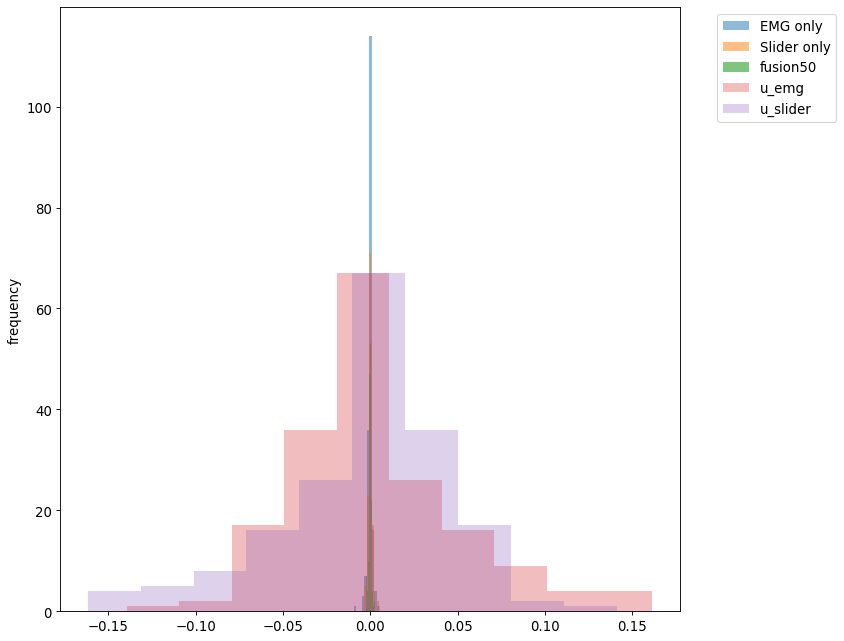

In [5]:
plt.figure(figsize=(10, 10), dpi=80)

plt.hist(u_emgonly.flatten(),alpha=0.5,label = 'EMG only')
plt.hist(u_slideronly.flatten(),alpha=0.5,label = 'Slider only')
plt.hist(u_fusion50.flatten(),alpha=0.6,label = 'fusion50')
plt.hist(u_emg.flatten(),alpha=0.3,label = 'u_emg')
plt.hist(u_slider.flatten(),alpha=0.3,label = 'u_slider')

plt.ylabel('frequency')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show() 

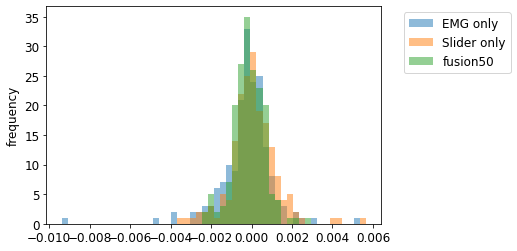

In [6]:
bins=np.histogram(np.hstack((u_emgonly.flatten(),u_slideronly.flatten(),u_fusion50.flatten())), bins=50)[1] #get the bin edges
plt.hist(u_emgonly.flatten(),bins,alpha=0.5,label = 'EMG only')
plt.hist(u_slideronly.flatten(),bins,alpha=0.5,label = 'Slider only')
plt.hist(u_fusion50.flatten(),bins,alpha=0.5,label = 'fusion50')

plt.ylabel('frequency')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show() 

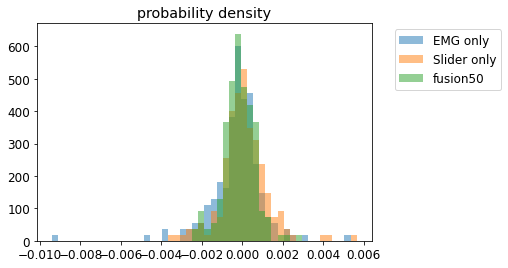

In [7]:
# bin_size
bins=np.histogram(np.hstack((u_emgonly.flatten(),u_slideronly.flatten(),u_fusion50.flatten())), bins=50)[1] #get the bin edges
plt.hist(u_emgonly.flatten(),bins,alpha=0.5,density=True,label = 'EMG only',color='#1f77b4')
plt.hist(u_slideronly.flatten(),bins,alpha=0.5,density=True,label = 'Slider only',color='#ff7f0e')
plt.hist(u_fusion50.flatten(),bins,alpha=0.5,density=True,label = 'fusion50',color='#2ca02c')

plt.title('probability density')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show() 

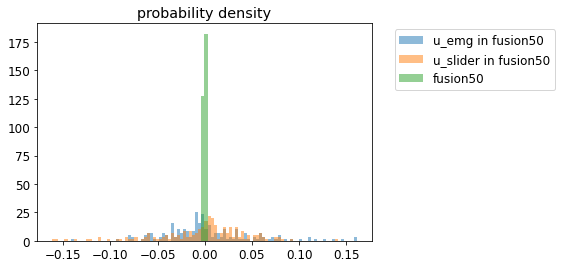

In [8]:
#enlarge to see u_emg and u_slider
bins=np.histogram(np.hstack((u_emg.flatten(),u_slider.flatten(),u_fusion50.flatten())), bins=100)[1] #get the bin edges
plt.hist(u_emg.flatten(),bins,alpha=0.5,density=True,label = 'u_emg in fusion50',color='#1f77b4')
plt.hist(u_slider.flatten(),bins,alpha=0.5,density=True,label = 'u_slider in fusion50',color='#ff7f0e')
plt.hist(u_fusion50.flatten(),bins,alpha=0.5,density=True,label = 'fusion50',color='#2ca02c')

plt.title('probability density')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show() 

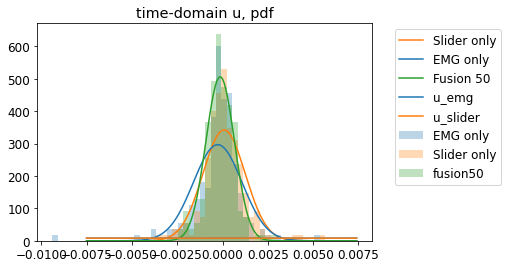

In [9]:
from scipy.stats import norm
import statistics
bins=np.histogram(np.hstack((u_emgonly.flatten(),u_slideronly.flatten(),u_fusion50.flatten())), bins=50)[1] #get the bin edges
plt.hist(u_emgonly.flatten(),bins,alpha=0.3,density=True,label = 'EMG only',color='#1f77b4')
plt.hist(u_slideronly.flatten(),bins,alpha=0.3,density=True,label = 'Slider only',color='#ff7f0e')
plt.hist(u_fusion50.flatten(),bins,alpha=0.3,density=True,label = 'fusion50',color='#2ca02c')
# plt.hist(u_emg.flatten(),bins,alpha=0.5,density=True,label = 'u_emg')
# plt.hist(u_slider.flatten(),bins,alpha=0.5,density=True,label = 'u_slider')
    
x_axis = np.arange(-0.0075, 0.0075, 1e-4)

mean = []
sd = []
    
# Calculating mean and standard deviation
mean.append( statistics.mean(u_slideronly.flatten()))
sd.append( statistics.stdev(u_slideronly.flatten()))
plt.plot(x_axis, norm.pdf(x_axis, mean[0], sd[0]),label='Slider only',color='#ff7f0e')
mean.append(statistics.mean(u_emgonly.flatten()))
sd.append( statistics.stdev(u_emgonly.flatten()))
plt.plot(x_axis, norm.pdf(x_axis, mean[1], sd[1]),label='EMG only',color='#1f77b4')
mean.append( statistics.mean(u_fusion50.flatten()))
sd.append( statistics.stdev(u_fusion50.flatten()))
plt.plot(x_axis, norm.pdf(x_axis, mean[2], sd[2]),label='Fusion 50',color='#2ca02c')

mean.append( statistics.mean(u_emg.flatten()))
sd.append( statistics.stdev(u_emg.flatten()))
plt.plot(x_axis, norm.pdf(x_axis, mean[3], sd[3]),label='u_emg')
mean.append( statistics.mean(u_slider.flatten()))
sd.append( statistics.stdev(u_slider.flatten()))
plt.plot(x_axis, norm.pdf(x_axis, mean[4], sd[4]),label='u_slider')

plt.title('time-domain u, pdf')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

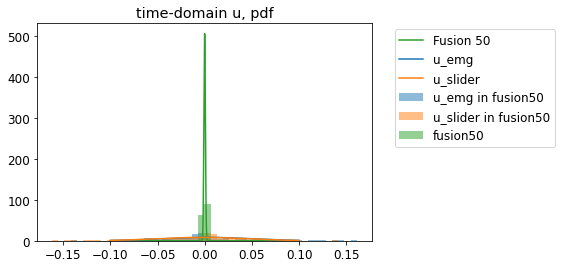

In [10]:
bins=np.histogram(np.hstack((u_emg.flatten(),u_slider.flatten(),u_fusion50.flatten())), bins=50)[1] #get the bin edges
plt.hist(u_emg.flatten(),bins,alpha=0.5,density=True,label = 'u_emg in fusion50',color='#1f77b4')
plt.hist(u_slider.flatten(),bins,alpha=0.5,density=True,label = 'u_slider in fusion50',color='#ff7f0e')
plt.hist(u_fusion50.flatten(),bins,alpha=0.5,density=True,label = 'fusion50',color='#2ca02c')
    
x_axis = np.arange(-0.1, 0.1, 1e-4)
    
# Calculating mean and standard deviation
plt.plot(x_axis, norm.pdf(x_axis, mean[2], sd[2]),label='Fusion 50',color='#2ca02c')
plt.plot(x_axis, norm.pdf(x_axis, mean[3], sd[3]),label='u_emg',color='#1f77b4')
plt.plot(x_axis, norm.pdf(x_axis, mean[4], sd[4]),label='u_slider',color='#ff7f0e')

plt.title('time-domain u, pdf')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

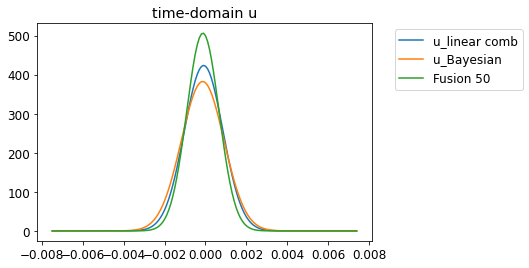

In [11]:
#50% linear comb estimated u from slider only and emg only
u_est = 0.5*u_emgonly + 0.5*u_slideronly

#Bayesian integration of u_emgonly and u_slideronly
alpha = sd[1]**4 / (sd[1]**4 + sd[0]**4)  #variance^2
Bay_mean = alpha*mean[1] + (1-alpha)*mean[0] #Bay_mean = alpha*mean[0] + (1-alpha)*mean[1]
Bay_var2 = alpha*sd[0]**4 #variance^2 = alpha*var #Bay_var2 = alpha*sd[0]**2
Bay_sd = np.sqrt(np.sqrt(Bay_var2))

lin_mean = statistics.mean(u_est.flatten())
lin_sd = statistics.stdev(u_est.flatten())

x_axis = np.arange(-0.0075, 0.0075, 1e-4)

plt.plot(x_axis, norm.pdf(x_axis, lin_mean, lin_sd),label='u_linear comb')
plt.plot(x_axis, norm.pdf(x_axis, Bay_mean, Bay_sd),label='u_Bayesian')
plt.plot(x_axis, norm.pdf(x_axis, mean[2], sd[2]),label='Fusion 50')


plt.title('time-domain u')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [12]:
alpha

0.6385486314142598

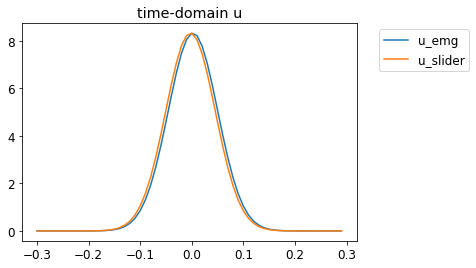

In [13]:
x_axis = np.arange(-0.3, 0.3, 1e-2)

mean = statistics.mean(u_emg.flatten())
sd = statistics.stdev(u_emg.flatten())
plt.plot(x_axis, norm.pdf(x_axis, mean, sd),label='u_emg')
mean = statistics.mean(u_slider.flatten())
sd = statistics.stdev(u_slider.flatten())
plt.plot(x_axis, norm.pdf(x_axis, mean, sd),label='u_slider')


plt.title('time-domain u')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

## freq-domain u

In [14]:
#mask for index of freq that are less than 1Hz
def lessthanone(x): return x <= 1.0
indexone = [idx for idx, element in enumerate(xf) if lessthanone(element)]
unwanted_index = {4,  6, 10, 14, 22, 26, 34, 38}
nonstimulated_index = [i for i in indexone if i not in unwanted_index]

In [15]:
# u_slideronly (i.e. condition 0)
u_slideronly = []
for p in range(participants_num):
    u = []
    for i in range(trialnum[0]):
        u.append(DATA['FREQ']['subject'+str(p)]['condition'+str(0)]['U'][i][indexone])
    u_slideronly.append(np.mean(u,axis=1))
u_slideronly = np.asarray(u_slideronly)

# u_emgonly (i.e. condition 1)
u_emgonly = []
for p in range(participants_num):
    u = []
    for i in range(trialnum[1]):
        u.append(DATA['FREQ']['subject'+str(p)]['condition'+str(1)]['U'][i][indexone])
    u_emgonly.append(np.mean(u,axis=1))
u_emgonly = np.asarray(u_emgonly)

# u_fusion50 (i.e. condition 2)
u_fusion50 = []
for p in range(participants_num):
    u = []
    for i in range(trialnum[1]):
        u.append(DATA['FREQ']['subject'+str(p)]['condition'+str(2)]['U'][i][indexone])
    u_fusion50.append(np.mean(u,axis=1))
u_fusion50 = np.asarray(u_fusion50)

In [16]:
# u_slider in fuson50 (i.e. u1 in condition 2)
u_slider = []
for p in range(participants_num):
    u = []
    for i in range(trialnum[0]):
        u.append(DATA['FREQ']['subject'+str(p)]['condition'+str(2)]['U1'][i][indexone])
    u_slider.append(np.mean(u,axis=1))
u_slider = np.asarray(u_slider)

# u_emg in fuson50 (i.e. u0 in condition 2)
u_emg = []
for p in range(participants_num):
    u = []
    for i in range(trialnum[0]):
        u.append(DATA['FREQ']['subject'+str(p)]['condition'+str(2)]['U0'][i][indexone])
    u_emg.append(np.mean(u,axis=1))
u_emg = np.asarray(u_emg)

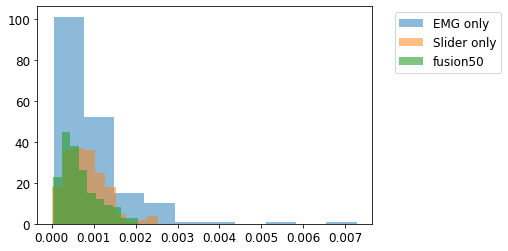

In [17]:
# plt.figure(figsize=(10, 10), dpi=80)

plt.hist(abs(u_emgonly).flatten(),alpha=0.5,label = 'EMG only')
plt.hist(abs(u_slideronly).flatten(),alpha=0.5,label = 'Slider only')
plt.hist(abs(u_fusion50).flatten(),alpha=0.6,label = 'fusion50')
# plt.hist(abs(u_emg).flatten(),alpha=0.3,label = 'u_emg')
# plt.hist(abs(u_slider).flatten(),alpha=0.3,label = 'u_slider')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show() 

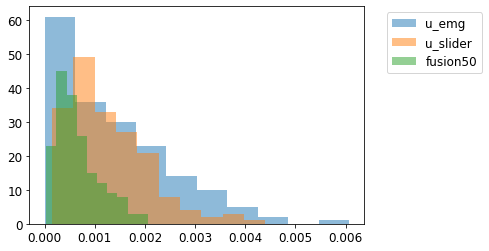

In [18]:

plt.hist(abs(u_emg).flatten(),alpha=0.5,label = 'u_emg')
plt.hist(abs(u_slider).flatten(),alpha=0.5,label = 'u_slider')
plt.hist(abs(u_fusion50).flatten(),alpha=0.5,label = 'fusion50')
# plt.hist(abs(u_slider*0.5+u_emg*0.5).flatten(),alpha=0.3,label = 'u_slider')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show() 

# tracking error (time domain)

In [19]:
# slideronly (i.e. condition 0)
e_slideronly = []
for p in range(participants_num):
    e = []
    for i in range(trialnum[0]):
        e.append(DATA['TIME']['subject'+str(p)]['condition'+str(0)]['r'][i] - DATA['TIME']['subject'+str(p)]['condition'+str(0)]['y'][i])
    e_slideronly.append(np.mean(e,axis=1))
e_slideronly = np.asarray(e_slideronly)

# emgonly (i.e. condition 1)
e_emgonly = []
for p in range(participants_num):
    e = []
    for i in range(trialnum[1]):
        e.append(DATA['TIME']['subject'+str(p)]['condition'+str(1)]['r'][i] - DATA['TIME']['subject'+str(p)]['condition'+str(1)]['y'][i])
    e_emgonly.append(np.mean(e,axis=1))
e_emgonly = np.asarray(e_emgonly)

# fusion50 (i.e. condition 2)
e_fusion50 = []
for p in range(participants_num):
    e = []
    for i in range(trialnum[1]):
        e.append(DATA['TIME']['subject'+str(p)]['condition'+str(2)]['r'][i] - DATA['TIME']['subject'+str(p)]['condition'+str(2)]['y'][i])
    e_fusion50.append(np.mean(e,axis=1))
e_fusion50 = np.asarray(e_fusion50)

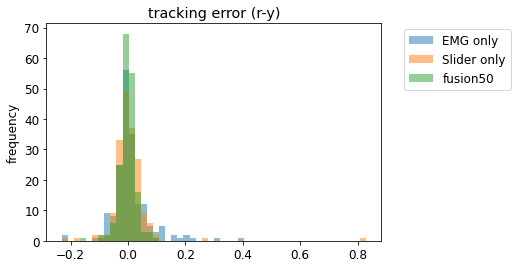

In [20]:
bins=np.histogram(np.hstack((e_emgonly.flatten(),e_slideronly.flatten(),e_fusion50.flatten())), bins=50)[1] #get the bin edges
plt.hist(e_emgonly.flatten(),bins,alpha=0.5,label = 'EMG only')
plt.hist(e_slideronly.flatten(),bins,alpha=0.5,label = 'Slider only')
plt.hist(e_fusion50.flatten(),bins,alpha=0.5,label = 'fusion50')

plt.title('tracking error (r-y)')
plt.ylabel('frequency')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show() 

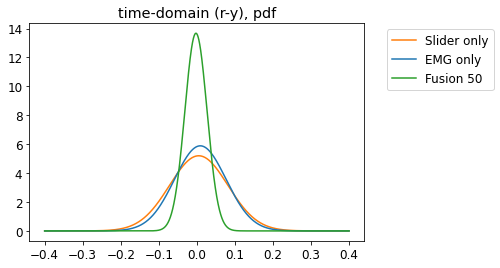

In [21]:
# bins=np.histogram(np.hstack((e_emgonly.flatten(),e_slideronly.flatten(),e_fusion50.flatten())), bins=50)[1] #get the bin edges
# plt.hist(e_emgonly.flatten(),bins,alpha=0.5,label = 'EMG only')
# plt.hist(e_slideronly.flatten(),bins,alpha=0.5,label = 'Slider only')
# plt.hist(e_fusion50.flatten(),bins,alpha=0.5,label = 'fusion50')
    
x_axis = np.arange(-0.4, 0.4, 1e-4)

mean = []
sd = []
    
# Calculating mean and standard deviation
mean.append( statistics.mean(e_slideronly.flatten()))
sd.append( statistics.stdev(e_slideronly.flatten()))
plt.plot(x_axis, norm.pdf(x_axis, mean[0], sd[0]),label='Slider only',color='#ff7f0e')
mean.append(statistics.mean(e_emgonly.flatten()))
sd.append( statistics.stdev(e_emgonly.flatten()))
plt.plot(x_axis, norm.pdf(x_axis, mean[1], sd[1]),label='EMG only',color='#1f77b4')
mean.append( statistics.mean(e_fusion50.flatten()))
sd.append( statistics.stdev(e_fusion50.flatten()))
plt.plot(x_axis, norm.pdf(x_axis, mean[2], sd[2]),label='Fusion 50',color='#2ca02c')

plt.title('time-domain (r-y), pdf')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()